# Case Study 1

### Team:  Dawson Dawson, Bodie Franklin, Kristi Herman, Steven Mann


### Table of Contents
* <a href='#bu'>Business Understanding</a>
* <a href='#de'>Data Evaluation/Engineering</a>
* <a href='#model1'>Modeling Preparations</a>
* <a href='#model2'>Model Building and Evaluation</a>
* <a href='#model3'>Model Interpretability and Explainability</a>
* <a href='#conclusions'>Case Conclusions</a>

---


<a id='bu'></a>
## Business Understanding

<i>What is trying to be solved for and why might it be important?</i><br>
Build a linear regression model to predict critical temperature and identify the variables that contribute the most to the model.

<a id='de'></a>
## Data Evaluation/Engineering

<i>Summarize the data being used in the case using appropriate mediums (charts, graphs, tables); address questions such as: Are there missing values? Which variables are needed (which ones are not)? What assumptions or conclusions are you drawing that need to be relayed to your audience?</i>

<a id='model1'></a>
## Modeling Preparations

<i>Which methods are you proposing to utilize to solve the problem?  Why is this method appropriate given the business objective? How will you determine if your approach is useful (or how will you differentiate which approach is more useful than another)?  More specifically, what evaluation metrics are most useful given that the problem is a regression one (ex., RMSE, logloss, MAE, etc.)?</i>

<a id='model2'></a>
## Model Building and Evaluations

<i>In this case, your primary task is to build a linear regression model using L1 or L2 regularization (or both) to predict the critical temperature and will involve the following steps:

- Specify your sampling methodology
- Setup your model(s) - specifying the regularization type chosen and including the parameters utilized by the model
- Analyze your model's performance - referencing your chosen evaluation metric (including supplemental visuals and analysis where appropriate)</i>

<a id='model3'></a>
## Model Interpretability and Explainability

<i>After all of your technical analysis and modeling; what are you proposing to your audience and why?  How should they view your results and what should they consider when moving forward?  Are there other approaches you'd recommend exploring?  This is where you "bring it all home" in language they understand.</i>

<a id='conclusions'></a>
## Case Conclusions

<i>Using at least one of your models above (if multiple were trained):  Which variable(s) was (were) "most important" and why?  How did you come to the conclusion and how should your audience interpret this?)</i>

In [1]:
#import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics as mt
import pandas_profiling

%matplotlib inline

In [2]:
#original datasets
df1=pd.read_csv("data/train.csv")
df2=pd.read_csv("data/unique_m.csv")

In [6]:
#merge by index
df_merged = df1.merge(df2, left_index=True, right_index=True)

#compare two columns for equality
df_merged['critical_temp_x'].equals(df_merged['critical_temp_y'])

True

In [7]:
#drop one of the critical temperature columns
df_merged = df_merged.drop(columns=['critical_temp_x'])

#rename critical temp column
df_merged = df_merged.rename(columns={"critical_temp_y": "critical_temp"})

df_merged.head()

,number_of_elements,mean_atomic_mass,wtd_mean_atomic_mass,gmean_atomic_mass,wtd_gmean_atomic_mass,entropy_atomic_mass,wtd_entropy_atomic_mass,range_atomic_mass,wtd_range_atomic_mass,std_atomic_mass,...,Au,Hg,Tl,Pb,Bi,Po,At,Rn,critical_temp,material
0,4,88.944468,57.862692,66.361592,36.116612,1.181795,1.062396,122.90607,31.794921,51.968828,...,0.0,0.0,0.0,0.0,0.0,0,0,0,29.0,Ba0.2La1.8Cu1O4
1,5,92.729214,58.518416,73.132787,36.396602,1.449309,1.057755,122.90607,36.161939,47.094633,...,0.0,0.0,0.0,0.0,0.0,0,0,0,26.0,Ba0.1La1.9Ag0.1Cu0.9O4
2,4,88.944468,57.885242,66.361592,36.122509,1.181795,0.975980,122.90607,35.741099,51.968828,...,0.0,0.0,0.0,0.0,0.0,0,0,0,19.0,Ba0.1La1.9Cu1O4
3,4,88.944468,57.873967,66.361592,36.119560,1.181795,1.022291,122.90607,33.768010,51.968828,...,0.0,0.0,0.0,0.0,0.0,0,0,0,22.0,Ba0.15La1.85Cu1O4
4,4,88.944468,57.840143,66.361592,36.110716,1.181795,1.129224,122.90607,27.848743,51.968828,...,0.0,0.0,0.0,0.0,0.0,0,0,0,23.0,Ba0.3La1.7Cu1O4


In [11]:
#check for dupes in the material column
df_merged['material'].duplicated().sum()

5721

In [21]:
#check for dupes in the material column
len(df_merged['material'].unique())

15542

In [18]:
#check all rows duplicated
df_merged.duplicated().sum()

0

In [13]:
pd.options.display.max_rows = 200
df_merged.dtypes

number_of_elements                   int64
mean_atomic_mass                   float64
wtd_mean_atomic_mass               float64
gmean_atomic_mass                  float64
wtd_gmean_atomic_mass              float64
entropy_atomic_mass                float64
wtd_entropy_atomic_mass            float64
range_atomic_mass                  float64
wtd_range_atomic_mass              float64
std_atomic_mass                    float64
wtd_std_atomic_mass                float64
mean_fie                           float64
wtd_mean_fie                       float64
gmean_fie                          float64
wtd_gmean_fie                      float64
entropy_fie                        float64
wtd_entropy_fie                    float64
range_fie                          float64
wtd_range_fie                      float64
std_fie                            float64
wtd_std_fie                        float64
mean_atomic_radius                 float64
wtd_mean_atomic_radius             float64
gmean_atomi

In [14]:
pd.options.display.max_rows = 200
df_merged.isnull().sum()

number_of_elements                 0
mean_atomic_mass                   0
wtd_mean_atomic_mass               0
gmean_atomic_mass                  0
wtd_gmean_atomic_mass              0
entropy_atomic_mass                0
wtd_entropy_atomic_mass            0
range_atomic_mass                  0
wtd_range_atomic_mass              0
std_atomic_mass                    0
wtd_std_atomic_mass                0
mean_fie                           0
wtd_mean_fie                       0
gmean_fie                          0
wtd_gmean_fie                      0
entropy_fie                        0
wtd_entropy_fie                    0
range_fie                          0
wtd_range_fie                      0
std_fie                            0
wtd_std_fie                        0
mean_atomic_radius                 0
wtd_mean_atomic_radius             0
gmean_atomic_radius                0
wtd_gmean_atomic_radius            0
entropy_atomic_radius              0
wtd_entropy_atomic_radius          0
r

In [15]:
df_merged.describe()

,number_of_elements,mean_atomic_mass,wtd_mean_atomic_mass,gmean_atomic_mass,wtd_gmean_atomic_mass,entropy_atomic_mass,wtd_entropy_atomic_mass,range_atomic_mass,wtd_range_atomic_mass,std_atomic_mass,...,Pt,Au,Hg,Tl,Pb,Bi,Po,At,Rn,critical_temp
count,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,...,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.0,21263.0,21263.0,21263.000000
mean,4.115224,87.557631,72.988310,71.290627,58.539916,1.165608,1.063884,115.601251,33.225218,44.391893,...,0.034108,0.020535,0.036663,0.047954,0.042461,0.201009,0.0,0.0,0.0,34.421219
std,1.439295,29.676497,33.490406,31.030272,36.651067,0.364930,0.401423,54.626887,26.967752,20.035430,...,0.307888,0.717975,0.205846,0.272298,0.274365,0.655927,0.0,0.0,0.0,34.254362
min,1.000000,6.941000,6.423452,5.320573,1.960849,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000210
25%,3.000000,72.458076,52.143839,58.041225,35.248990,0.966676,0.775363,78.512902,16.824174,32.890369,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,5.365000
50%,4.000000,84.922750,60.696571,66.361592,39.918385,1.199541,1.146783,122.906070,26.636008,45.123500,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,20.000000
75%,5.000000,100.404410,86.103540,78.116681,73.113234,1.444537,1.359418,154.119320,38.356908,59.322812,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,63.000000
max,9.000000,208.980400,208.980400,208.980400,208.980400,1.983797,1.958203,207.972460,205.589910,101.019700,...,5.800000,64.000000,8.000000,7.000000,19.000000,14.000000,0.0,0.0,0.0,185.000000


In [ ]:
#profiling
profile = df_merged.profile_report(title="Critical Temperature Data")
profile

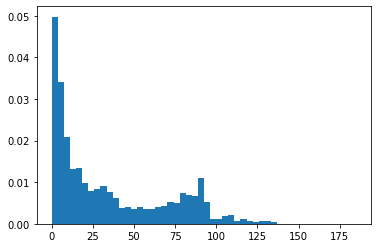

In [16]:
#histogram of critical temperatures
fig, ax = plt.subplots()
num_bins = 50
n, bins, patches = ax.hist(df_merged['critical_temp'], num_bins, density=True)

# Tweak spacing to prevent clipping of ylabel
# fig.tight_layout()
plt.show()

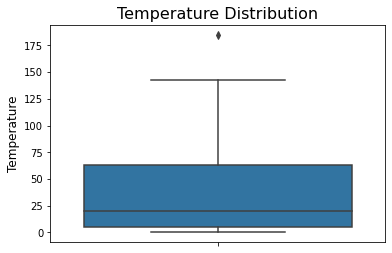

In [24]:
#boxplot
sns.boxplot(y=df_merged['critical_temp'])
plt.title("Temperature Distribution", fontsize=16)
plt.ylabel('Temperature', fontsize=12)
plt.show()